
# Algricultural pests recognition with image data

**Analyst:** Viet Dang

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
# <font color="red">1. Executive Summary </font>  

### <font color="yellow">**Business Problem:**</font>  


Agricultural pests pose a significant threat to crop yields and farm productivity. Early and accurate detection of pests is crucial for effective pest management and minimizing crop losses. However, manual detection of pests is labor-intensive and time-consuming. An automated system for classifying pest images can greatly enhance the efficiency of pest detection and facilitate timely intervention.

### <font color="yellow">**Data Set:**</font>

The dataset used for this study consists of 2,479 real images of five different types of agricultural pests, namely Ants, Bees, Grasshoppers, Moths, and Wasps.
(see more at [2. Data Preprocessing](#cell_Preprocessing))

### <font color="yellow">**Methods:**</font>

Two different convolutional neural networks (CNNs) were employed to classify the images into one of the five pest categories. The performance of the models was evaluated based on metrics such as accuracy, categorical cross-entropy loss, Kappa Score, precision, recall, and F1-scores. (see more at [3. Predictive Modeling](#cell_model))

### <font color="yellow">**Experiments:**</font>

**Obtained Results:** (see more at [3.3. Evaluation](#cell_report))

Two models were trained and tested on the dataset:

The learning curves revealed a consistently high loss for both models, indicating a struggle to effectively grasp the nuances within the dataset. This suggested the need for a more expansive dataset for improved model learning and comprehension.

Model 1 outperformed Model 2 in terms of Kappa Score (0.543 vs. 0.506) and accuracy (0.6343 vs. 0.6061), and generally exhibited better precision, recall, and F1-scores in weighted average and macro average, suggesting that it provides more balanced and accurate predictions for each class. However, it is important to note that while Model 1 demonstrated better performance in predicting the presence of bees and ants, Model 2 excelled in predicting the presence of grasshoper. Additionally, Model 1 showcased a more balanced and versatile approach in predicting various agricultural pests.


Based on the analysis, Model 1 is recommended for classifying pest images as it demonstrated better overall metrics compared to Model 2. However, the consistently high loss observed in the learning curves of both models suggests the need for a more expansive and diverse dataset to improve model learning and comprehension.

### <font color="yellow">**Recommendation:**</font>
(see more at "Recommendation" part in [4. Experiments Report](#cell_report))

After careful analysis of both models, we recommend deploying Model 1 for classifying pest images in agricultural settings. It is also worth noting that the model 1 is more efficient at computational resources since it is less complex than model 2.

For real-world deployment in agricultural settings, it is recommended to optimize the model for available computational resources, ensure robustness to variations in field conditions, integrate with existing agricultural monitoring systems, and continuously monitor and update the model to ensure its effectiveness over time.

<a id = "cell_Preprocessing"></a>
# <font color="red">2. Data Preprocessing </font>  

*Carry out necessary data preprocessing and exploration.*

In [4]:
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

Firstly, we import required library and package.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical


import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import random
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import os

tf.config.list_physical_devices('GPU')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

We import the dataset for predictive purpose.

In [6]:
# List of insect classes
insect_classes = ["ants", "bees", "grasshopper", "moth", "wasp"]

# Data parameters
img_rows, img_cols = 100, 100
channels = 3

num_classes = 5

# Base path for your image files
base_path = '/content/drive/MyDrive/Colab Notebooks/Part2_agricultural_pests/'

# Get a list of all files in the folder for each insect class
file_lists = {insect_class: os.listdir(os.path.join(base_path, insect_class)) for insect_class in insect_classes}

# Print the total number of files for each insect class
for insect_class in insect_classes:
    num_files = len(file_lists[insect_class])
    print(f'Total number of files under {insect_class} folder are: {num_files}')


Total number of files under ants folder are: 499
Total number of files under bees folder are: 500
Total number of files under grasshopper folder are: 485
Total number of files under moth folder are: 497
Total number of files under wasp folder are: 498


In [7]:
# Create a list to store the image data and labels
data = []

# Iterate through the insect classes
for insect_class in insect_classes:
    class_path = os.path.join(base_path, insect_class)

    # Iterate through the files in the class folder
    for file in os.listdir(class_path):
        # Check if the file is a jpeg or jpg file
        if file.endswith('.jpeg') or file.endswith('.jpg'):
            # Load the image data from the file using TensorFlow
            img = tf.io.read_file(os.path.join(class_path, file))
            img = tf.image.decode_jpeg(img)
            img = tf.image.resize(img, (100, 100))

            # Assign a label to the file
            label = insect_class

            # Add the image data and label to the data list
            data.append((img, label))


In the next step, we set random seed so that we can compare the results from 2 different models.

In [8]:
# Set a random seed for Python's built-in random module
random.seed(1996)

# Set a random seed for NumPy
np.random.seed(1996)

# Set a random seed for TensorFlow
tf.random.set_seed(1996)

# Load the image data from the file using TensorFlow
img = tf.io.read_file(os.path.join(class_path, file))
img = tf.image.decode_jpeg(img)
img = tf.image.resize(img, (100, 100))


Next, we split the dataset into training and testing.

In [9]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.8)], data[int(len(data) * 0.8):]

# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [10]:
# # Split data into images and labels
X_data = np.array([item[0] for item in data])
Y_data = np.array([item[1] for item in data])

# Reshape images for processing
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, channels)

# Convert pipxel values to 8 bits
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #divide to bring all the value into scale from 0-1
X_test /= 255

# Print original and encoded class of the first element in the training dataset
print('The original format of class of the first element in the training dataset is: ', Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(insect_classes)

# Create a mapping from category strings to integers
category_map = {category: idx for idx, category in enumerate(categories)}
category_map
# Create a mapping from class labels to integers
label = np.array(insect_classes)

class_to_int = {'ants': 0, 'bees': 1, 'grasshopper': 2, 'moth': 3, 'wasp': 4}


# Convert your string labels to integer labels
Y_train_int = [class_to_int[label] for label in Y_train]
Y_test_encoded = [class_to_int[label] for label in Y_test]

# Convert Y_train to one-hot encoded format
Y_train_encoded = to_categorical(Y_train_int, num_classes=num_classes)
Y_test_encoded = to_categorical(Y_test_encoded, num_classes = num_classes)



print('The unique integer mapping encoding format of the class of the first element in the training dataset is: ', Y_train_int[0])

The original format of class of the first element in the training dataset is:  ants 

The unique integer mapping encoding format of the class of the first element in the training dataset is:  0


We plot the imported images with their labels:

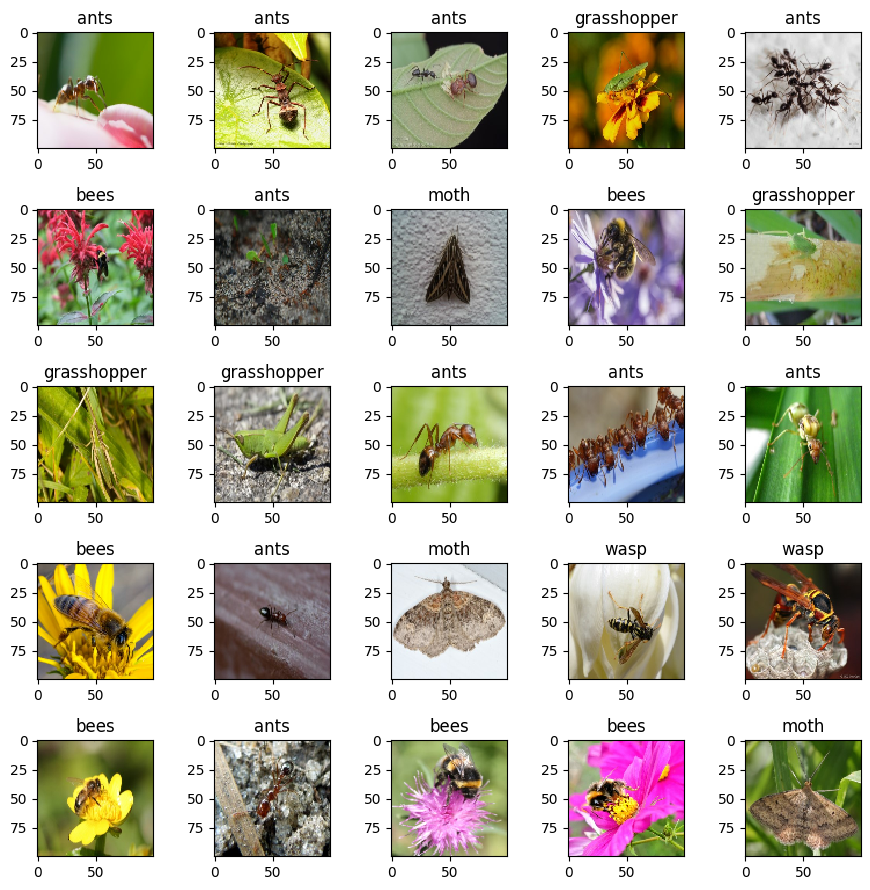

In [11]:
# Plot images with labels
plt.rcParams['figure.figsize'] = (9, 9)
labels = insect_classes

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train_int[i])]))

plt.tight_layout()
plt.show()

Create a function to plot history of our models:

In [12]:
#this function is to plot the training history
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

<a id = "cell_model"></a>
# <font color="red">3. Predictive Modeling</font>  

In this section, we experiment with two different convolutional neural network.

### 3.1. Deep learning model construction

In [13]:
#CNN model with two Convolution layers, one Pooling layer with max pooling,
def model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    # model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01))) # Add L2 regularization to dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001,weight_decay=1e-6),
              metrics='accuracy')

    model.summary()
    return model

Define callback to record training performnace.

In [14]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=1)]


In [15]:
model1 = model_1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

**Model 1:**

- Total Parameters: 1,182,469
- Layers:
  - Input Layer: Convolutional layer with 32 filters, kernel size (3, 3)
  - MaxPooling Layer: Reduces the spatial dimensions by a factor of 4
  - Dropout Layer: Regularization with a dropout rate of 0.5
  - Flatten Layer: Converts the 2D feature maps into a 1D vector
  - Dense Layer: Fully connected layer with 64 neurons and ReLU activation
  - Dropout Layer: Regularization with a dropout rate of 0.5
  - Output Layer: Dense layer with 5 neurons for classification task
  - Optimizer: using RMSprop

In [16]:
#CNN model with two Convolution layers, one Pooling layer with max pooling,
def model_2():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              metrics='accuracy')

    model.summary()
    return model

In [17]:
model2 = model_2()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               9834624   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

**Model 2:**

- Total Parameters: 9,836,165
- Layers:
  - Input Layer: Convolutional layer with 32 filters, kernel size (3, 3)
  - MaxPooling Layer: Reduces the spatial dimensions by a factor of 4
  - Dropout Layer: Regularization with a dropout rate of 0.5
  - Flatten Layer: Converts the 2D feature maps into a 1D vector
  - Dense Layer: Fully connected layer with 128 neurons and ReLU activation
  - Dropout Layer: Regularization with a dropout rate of 0.5
  - Output Layer: Dense layer with 5 neurons for classification task.
  - Optimizer: using Adam

**COMPARISON**
- Model 2 is significantly larger in terms of the number of parameters (9,836,165) compared to Model 1 (1,182,469). This implies that Model 2 is a deeper and more complex network.
- Model 2 uses smaller kernal and pool sizes, which may allow to finer-grained feature extraction.
- Model 2 has a larger fully connected layer with 128 neurons, while Model 1 has a smaller layer with 64 neurons.
- Both models use dropout layers for regularization, which can help prevent overfitting.
- The output layers of both models have 5 neurons, indicating a classification task with 5 classes.
- Model 2, with the Adam optimizer, mioght be less prone to overfitting compared to model 1.


### 3.2. Model Execution

In [39]:
hist1 = model1.fit(X_train, Y_train_encoded,
      batch_size=128,
      epochs=500,
      verbose=2,
      validation_data=(X_test, Y_test_encoded),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/500
16/16 - 1s - loss: 0.1378 - accuracy: 0.9500 - val_loss: 1.6717 - val_accuracy: 0.6101 - 665ms/epoch - 42ms/step
Epoch 2/500
16/16 - 0s - loss: 0.1118 - accuracy: 0.9591 - val_loss: 1.8757 - val_accuracy: 0.5899 - 464ms/epoch - 29ms/step
Epoch 3/500
16/16 - 0s - loss: 0.1262 - accuracy: 0.9556 - val_loss: 1.5652 - val_accuracy: 0.6444 - 462ms/epoch - 29ms/step
Epoch 4/500
16/16 - 0s - loss: 0.1148 - accuracy: 0.9561 - val_loss: 1.5576 - val_accuracy: 0.6586 - 450ms/epoch - 28ms/step
Epoch 5/500
16/16 - 0s - loss: 0.1306 - accuracy: 0.9439 - val_loss: 1.6560 - val_accuracy: 0.6384 - 475ms/epoch - 30ms/step
Epoch 6/500
16/16 - 0s - loss: 0.1327 - accuracy: 0.9510 - val_loss: 1.7242 - val_accuracy: 0.6081 - 449ms/epoch - 28ms/step
Epoch 7/500
16/16 - 0s - loss: 0.1090 - accuracy: 0.9662 - val_loss: 1.5722 - val_accuracy: 0.6465 - 449ms/epoch - 28ms/step
Epoch 8/500
16/16 - 0s - loss: 0.1117 - accuracy: 0.9662 - val_loss: 1.7779 - val_accuracy: 0.6323 - 444ms/epoch - 28ms/step


In [40]:
# Evaluate on training data
train_score1 = model1.evaluate(X_train, Y_train_encoded, verbose=0)
print('Train loss:', round(train_score1[0], 4))
print('Train accuracy:', round(train_score1[1], 4), '\n')

# Evaluate on test data
test_score1 = model1.evaluate(X_test, Y_test_encoded, verbose=0)
print('Test loss:', round(test_score1[0], 4))
print('Test accuracy:', round(test_score1[1], 4))

Train loss: 0.0055
Train accuracy: 0.999 

Test loss: 1.9126
Test accuracy: 0.6343


In [41]:
hist2 = model2.fit(X_train, Y_train_encoded,
      batch_size=128,
      epochs=500,
      verbose=2,
      validation_data=(X_test, Y_test_encoded),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/500
16/16 - 1s - loss: 0.0134 - accuracy: 0.9985 - val_loss: 1.7096 - val_accuracy: 0.6081 - 763ms/epoch - 48ms/step
Epoch 2/500
16/16 - 1s - loss: 0.0103 - accuracy: 0.9985 - val_loss: 1.7036 - val_accuracy: 0.6202 - 538ms/epoch - 34ms/step
Epoch 3/500
16/16 - 1s - loss: 0.0103 - accuracy: 0.9985 - val_loss: 1.7491 - val_accuracy: 0.6061 - 540ms/epoch - 34ms/step
Epoch 4/500
16/16 - 1s - loss: 0.0109 - accuracy: 0.9985 - val_loss: 1.7089 - val_accuracy: 0.6000 - 873ms/epoch - 55ms/step
Epoch 5/500
16/16 - 1s - loss: 0.0100 - accuracy: 0.9985 - val_loss: 1.6372 - val_accuracy: 0.6343 - 929ms/epoch - 58ms/step
Epoch 6/500
16/16 - 1s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.7445 - val_accuracy: 0.6222 - 642ms/epoch - 40ms/step
Epoch 7/500
16/16 - 1s - loss: 0.0072 - accuracy: 0.9995 - val_loss: 1.7058 - val_accuracy: 0.6101 - 564ms/epoch - 35ms/step
Epoch 8/500
16/16 - 0s - loss: 0.0068 - accuracy: 0.9995 - val_loss: 1.7423 - val_accuracy: 0.6283 - 493ms/epoch - 31ms/step


In [42]:
# Evaluate on training data
train_score2 = model2.evaluate(X_train, Y_train_encoded, verbose=0)
print('Train loss:', round(train_score2[0], 4))
print('Train accuracy:', round(train_score2[1], 4), '\n')

# Evaluate on test data
test_score2 = model2.evaluate(X_test, Y_test_encoded, verbose=0)
print('Test loss:', round(test_score2[0], 4))
print('Test accuracy:', round(test_score2[1], 4))

Train loss: 0.0006
Train accuracy: 1.0 

Test loss: 1.7814
Test accuracy: 0.6061


### 3.3. Evaluation

In this section, we will delve into the performance results of both models and provide our recommendations based on these outcomes.

    Models  Accuracy    Loss
0  Model 1    0.6343  1.9126
1  Model 2    0.6061  1.7814 



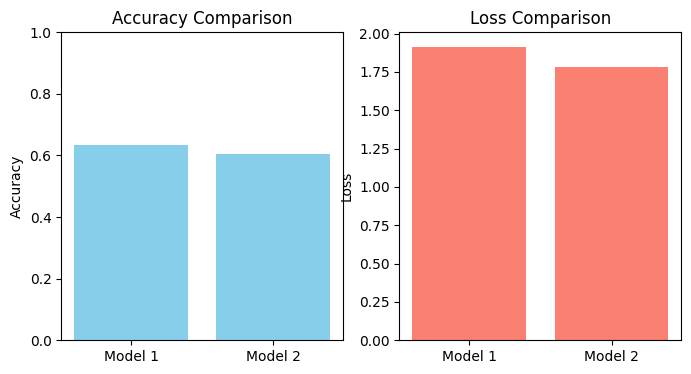

In [57]:
# Data
models = ['Model 1', 'Model 2']
accuracy = [0.6343, 0.6061]
loss = [1.9126, 1.7814]

data = {
    "Models" : models,
    "Accuracy" : accuracy,
    "Loss" : loss
}

#create a table of performance

performance_table = pd.DataFrame(data)

print(performance_table, '\n')

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot accuracy
ax1.bar(models, accuracy, color='skyblue')
ax1.set_title('Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Plot loss
ax2.bar(models, loss, color='salmon')
ax2.set_title('Loss Comparison')
ax2.set_ylabel('Loss')

plt.show()

Model 1 has a higher accuracy (0.6343) compared to Model 2 (0.6061), indicating that it performs better in terms of correct predictions on the test data.

Model 1 also has a slightly higher categorical cross-entropy loss (1.9126) compared to Model 2 (1.7814), which suggests that it has a better overall fit to the training data.

Based on these metrics, Model 1 appears to outperform Model 2 in terms of accuracy, making it the preferred choice if accuracy are the primary evaluation criteria. In terms of fitting the data, model 2 performs slightly better.

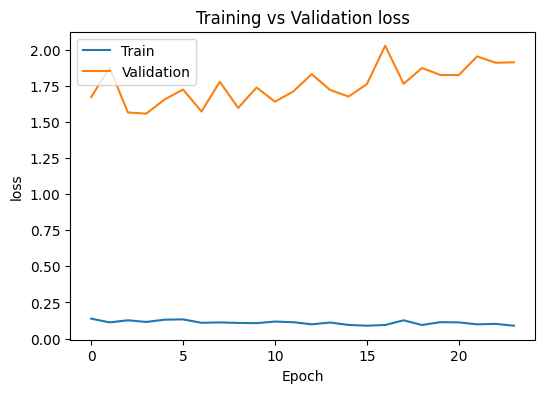

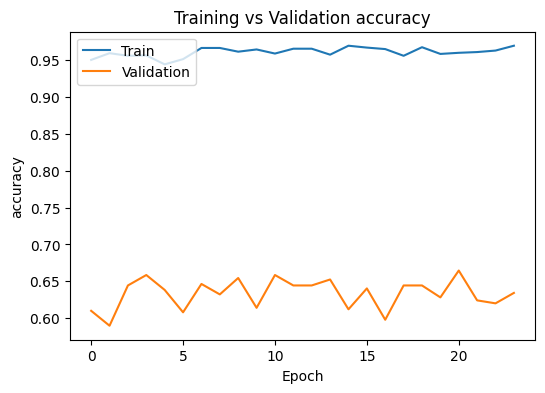

In [44]:
hist1 = pd.DataFrame(hist1.history)
# Plot history
plot_hist(hist1, xsize=6, ysize=4)

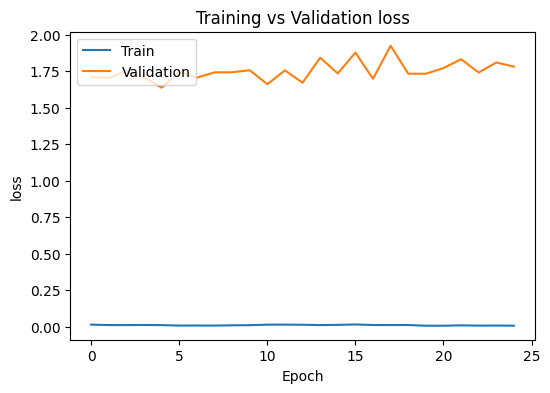

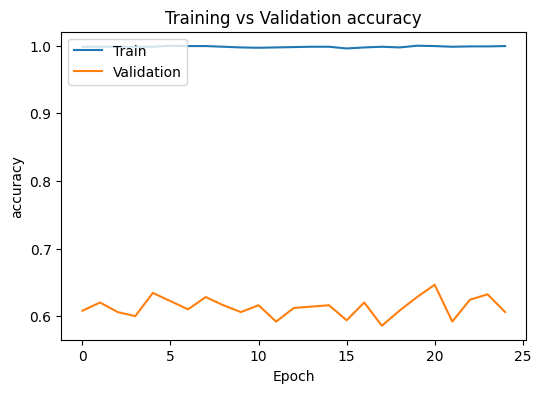

In [45]:
hist2 = pd.DataFrame(hist2.history)
# Plot history
plot_hist(hist2, xsize=6, ysize=4)

The learning curves graphs reveal a persistent challenge: a consistently high loss, suggesting that the model struggled to effectively grasp the nuances within the dataset. This plateau in performance may imply the need for a more expansive dataset to facilitate improved model learning and comprehension.

In [54]:
# Make predictions on the test set
Y_pred_encoded1 = model1.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous1 = np.round(Y_pred_encoded1)

# Convert the predicted labels to multiclass format
y_pred_multiclass1 = np.argmax(Y_pred_encoded1, axis=1)
y_test_multiclass1 = np.argmax(Y_test_encoded, axis=1)

# Calculate the kappa score
kappa1 = cohen_kappa_score(y_test_multiclass1, y_pred_multiclass1)
print("The result of Kappa is :", round(kappa1, 3))

# Generate the classification report
report1 = classification_report(y_test_multiclass1, y_pred_multiclass1, target_names= insect_classes)

# Print the report
print("The result of the classification report is: \n ",report1)
# Make predictions on the test set
Y_pred_encoded2 = model2.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous2 = np.round(Y_pred_encoded2)

# Convert the predicted labels to multiclass format
y_pred_multiclass2 = np.argmax(Y_pred_encoded2, axis=1)
y_test_multiclass2 = np.argmax(Y_test_encoded, axis=1)

# Calculate the kappa score
kappa2 = cohen_kappa_score(y_test_multiclass2, y_pred_multiclass2)
print("The result of Kappa is :", round(kappa2, 3))

# Generate the classification report
report2 = classification_report(y_test_multiclass2, y_pred_multiclass2, target_names= insect_classes)

# Print the report
print("The result of the classification report is: \n ",report2)

16/16 [==============================] - 0s 4ms/step
The result of Kappa is : 0.543
The result of the classification report is: 
                precision    recall  f1-score   support

        ants       0.51      0.61      0.56        85
        bees       0.57      0.60      0.59       101
 grasshopper       0.63      0.52      0.57       111
        moth       0.80      0.71      0.76       104
        wasp       0.67      0.73      0.70        94

    accuracy                           0.63       495
   macro avg       0.64      0.64      0.63       495
weighted avg       0.64      0.63      0.64       495

16/16 [==============================] - 0s 4ms/step
The result of Kappa is : 0.506
The result of the classification report is: 
                precision    recall  f1-score   support

        ants       0.53      0.51      0.52        85
        bees       0.62      0.52      0.57       101
 grasshopper       0.51      0.57      0.54       111
        moth       0.70      0.7

**Comparison:**

Model 1 outperforms Model 2 in terms of both Kappa Score and Accuracy. It has a higher Kappa Score (0.543 vs. 0.506) and a higher accuracy.

Model 1 generally has better precision, recall, and F1-scores on weighted average compared to Model 2. This suggests that Model 1 provides more balanced and accurate predictions for each class.

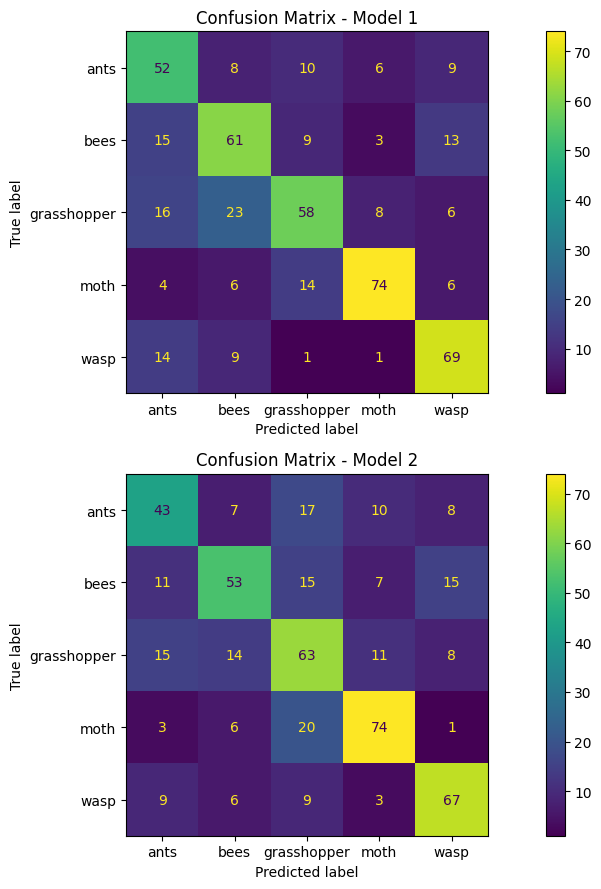

In [56]:
# Calculate confusion matrices for Model 1 and Model 2
cm1 = confusion_matrix(
    y_test_multiclass1,
    y_pred_multiclass1)

cm2 = confusion_matrix(
    y_test_multiclass2,
    y_pred_multiclass2)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

# Plot confusion matrix for Model 1
display1 = ConfusionMatrixDisplay(
    confusion_matrix=cm1,
    display_labels=insect_classes)
display1.plot(ax=axes[0])
axes[0].set_title('Confusion Matrix - Model 1')

# Plot confusion matrix for Model 2
display2 = ConfusionMatrixDisplay(
    confusion_matrix=cm2,
    display_labels=insect_classes)
display2.plot(ax=axes[1])
axes[1].set_title('Confusion Matrix - Model 2')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Analyzing the confusion matrix, the following observations can be made:

- Model 1 demonstrates better performance in predicting the presence of bees and ants, outperforming Model 2 slightly in this category.
- On the other hand, Model 2 excels in predicting the presence of grasshoper when compared to Model 1.
- Model 1 showcases a more balanced and versatile approach in predicting various agricultural pests.

In summary, the two models have strengths in different areas of pest prediction. However, the test results might be more reliable if we use cross-validation to check the average result of the model.

---

<a id = "cell_report"></a>
# <font color="red">4. Experiments Report</font>  

### <font color="yellow">**Recommendation:**</font>  

Based on the analysis, Model 1 is recommended for classifying pest images as it outperforms Model 2 in terms of accuracy, loss, Kappa Score, and generally has better precision, recall, and F1-scores across all classes. While Model 2 excels in predicting the presence of grasshoper, Model 1 demonstrates superior performance in predicting the presence of bees and ants and exhibits better overall metrics and has a more balanced approach in predicting various agricultural pests, making it the preferred choice.

***Potential Approaches to Improve Performance:***

- Expanding the Dataset: The learning curves indicate a consistently high loss, suggesting that the model struggled to effectively grasp the nuances within the dataset. A more expansive and diverse dataset can facilitate improved model learning and comprehension.

- Data Augmentation: Augmenting the data by creating variations of the images, such as rotations, flips, and changes in lighting, can help the model generalize better and improve its performance.

- Fine-tuning the Model: Adjusting hyperparameters such as learning rate, number of layers, and number of nodes in each layer can lead to a better-fitted model.

***For real-world deployment in agricultural settings, it is important to consider the following:***

- Computational Resources: The model needs to be optimized for the available computational resources in the field, which may be limited.

- Robustness to Variability: The model needs to be robust to variations in lighting, scale, and orientation of the pests, as these conditions can vary significantly in the field.

- Integration with Existing Systems: The model needs to be integrated with existing agricultural monitoring and management systems.

- Continuous Monitoring and Updating: The model's performance needs to be continuously monitored, and the model should be updated as necessary to ensure it remains effective over time. Regular feedback from the field and incorporation of new data can help in keeping the model updated and relevant.


### References:
- Hunter, J., Dale, D., Firing, E., Droettboom, M. & Matplotlib development team (2012). Pyplot Tutorial, Matplotlib, https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
